Here I will attempt to use Linear Regression to predict yearly spending. I will do so using a public dataset on
Ecommerce

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading in the dataset
df = pd.read_csv('Ecommerce Customers')

First I check the .head(), .info() and the .describe() to get a general idea of the data

Here we learn the following:
- y = Yearly Amount Spent
- Email, Address and (most likely) Avatar dont seem too likely for predicting Yearly Amount Spent (although an argument could be made for selection bias in Avatar = similair kind of people choose the same avatar and in that way it could used for prediction, but we will not do that here)
- X will exist of: Avg. Session Length, Time on App, Time on Website and Length of Membership = All numerical
- Although the variablers all have numerical data, the ranges differ and feature scaling could therefore be used to allow for 'fair' effects. However, as we are using Lineair Regression we dont have to do this

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

From the joint plots we see that:
- There doesnt seem to be a strong correlation between Time on Website and our dependent variable.
- We see a rather strong correlation between Time on App and our dependent variable. 
- We dont seem to observe a strong relationship between Time on App and Length of Membership

What this means:
- It may be more important to focus marketing to increase Time on App as compared to Time on Website
- As membership duration doesnt seem to be strongly correlated with Time on App, perhaps many purchases via the app come from new customers. This may indicate effective conversion for the App

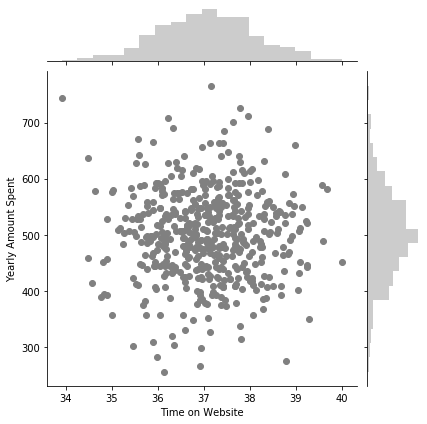

In [6]:
sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent', data = df, color='grey')

Now for the Time on App feature:

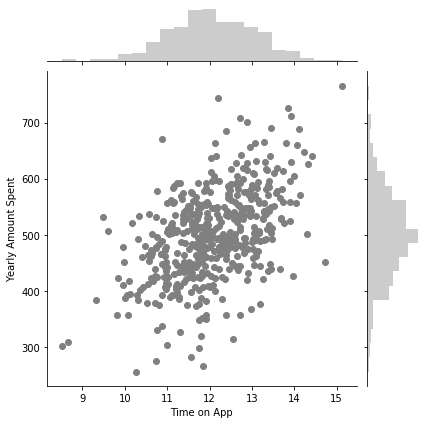

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data = df, color='grey')

Hexplot showing the correlation between Length of Membership and Time on App

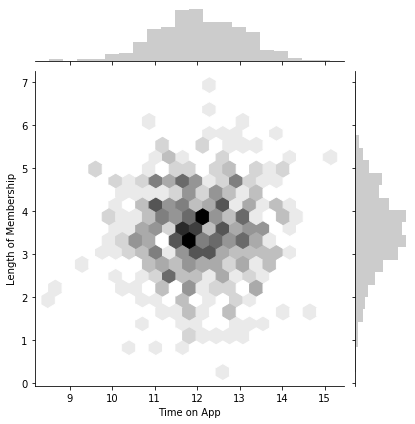

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data = df, color = 'grey', kind='hex')

**Next I explore these types of relationships across the entire data set.**

We see the following:
- Yearly Amount Spend and Length of Membership seem to have a very strong correlation!
- Yearly Amount Spend and Time on App seem to have a reasonable correlation
- Time on App and Length of Membership do not seem to have a correlation

This reinforces our earlier idea that Time on App is mostly being used by new customers and it leads to several questions:
- Is conversion on the app high?
- Is retention on the app low?

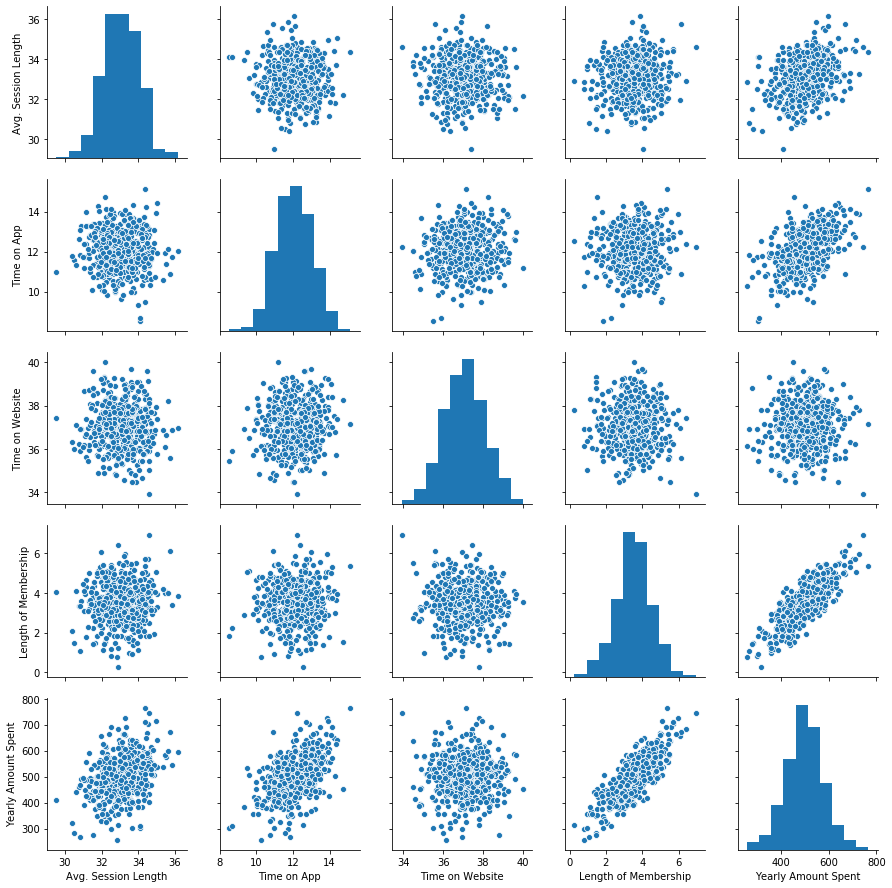

In [9]:
sns.pairplot(df, palette = 'grey')

**Linear model plot of  Yearly Amount Spent vs. Length of Membership. **

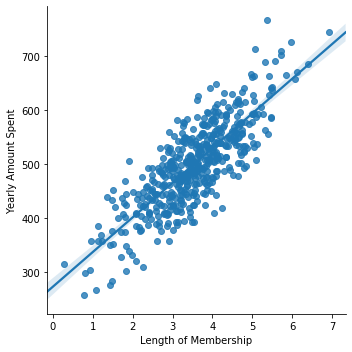

In [10]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df, palette = 'grey')

## Training and Testing Data

Now that the data has been explored for a bit, its time to split the data into training and testing sets.

In [11]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [12]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

**train_test_split for cross validation**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=101)

Creating an instance of a LinearRegression()

In [27]:
lm = LinearRegression()

fitting lm on the training data

In [28]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept and Coefficients of the model

In [17]:
lm.intercept_

-1047.9327822502385

In [30]:
Final = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficient'])
Final

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data


In [19]:
predictions = lm.predict( X_test)

Creating a scatterplot to see how our predictions match up against the actual y values: It does quite well

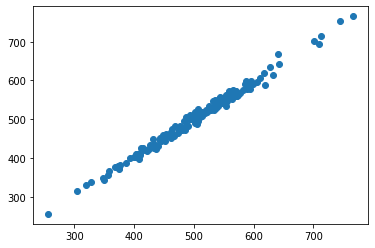

In [20]:
plt.scatter(y_test,predictions)

## Evaluating the Model

We see a Mean Absolute Error of about 7 dollar Yearly Spending on an average of almost 500 dollars Yearly Spending. That is a pretty accurate result!

In [31]:
from sklearn import metrics

In [32]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  7.228148653430835
MSE =  79.81305165097443
RMSE =  8.933815066978633


## Residuals

Lets plot the residuals in case there might be anything weird

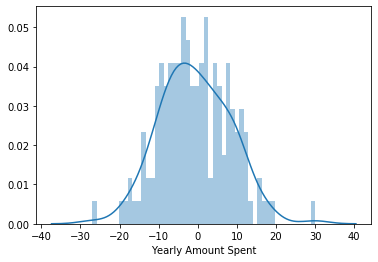

In [33]:
sns.distplot(y_test - predictions, bins = 50)

## Conclusion
Looking at the coeficients we see learn the following:
- Length of Membership is the biggest predictor, after that Time on App and 3th Avg. Session Length
- Time on Website barely has an effect on Yearly Spending

These results bring up the following questions:
- Would there be any interaction effects? e.g. would Avg. Session Length be a bigger/smaller predictor on the Website as compared to the App?
- Interaction effects for Length of Membership?
- What is the most cost-effective? (cant answer that with this data)

In [24]:
lm.intercept_

-1047.9327822502385

In [25]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [26]:
Final = pd.DataFrame(lm.coef_,X.columns, columns = ['Coefficient'])
Final

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## scaling the data
lets see if this improves the model

In [34]:
from sklearn import preprocessing

In [35]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [36]:
lm_scaled = LinearRegression()

In [37]:
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm_scaled.intercept_

498.7231164913073

In [40]:
Final = pd.DataFrame(lm_scaled.coef_,X.columns, columns = ['Coefficient'])
Final

,Coefficient
Avg. Session Length,26.042651
Time on App,36.674257
Time on Website,0.185039
Length of Membership,60.202360


In [41]:
predictions = lm_scaled.predict(X_test_scaled)

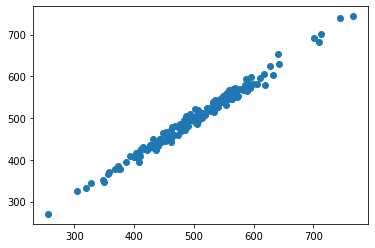

In [42]:
plt.scatter(y_test,predictions)

As I had thought, feature scaling was not needed and actually even decreased our results! This confirms that Lineair Regression does not greatly benefit from feature scaling

In [45]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  9.369764701026464
MSE =  133.27454165600943
RMSE =  11.544459348796263


In [46]:
X_train_scaled

array([[-1.49994106, -0.7308338 , -0.04298381,  0.27443007],
       [-1.16374302,  2.11003957, -0.06072863,  0.20010103],
       [ 0.22847958, -0.54678302,  0.04810959,  1.14125825],
       ...,
       [-1.19842351,  0.44884576,  0.35779627, -0.57704253],
       [ 0.84814529, -0.47330089,  0.00683273,  0.17463764],
       [-0.83740685, -0.68165245,  1.14857087,  1.28933518]])